In [1]:
# To get latest tensorflow working on GPU in Anaconda environment
# conda create -n tf-gpu tensorflow-gpu
# conda activate tf-gpu
# pip install tensorflow-gpu --upgrade

# Creating the dataset. Ignore this section and directly download the dataset

### Save Oxford Flowers Tensorflow dataset to image files
https://www.robots.ox.ac.uk/~vgg/data/flowers/102/

In [2]:
# Install tensorflow datasets package
# ! pip install tensorflow_datasets

In [3]:
# Import the necessary packages
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [4]:
# Load the dataset with TensorFlow Datasets.
dataset = tfds.load('oxford_flowers102', as_supervised=True)

In [5]:
# Split out the individual items in the dataset dictionary
test_set, training_set, validation_set = dataset['test'], dataset['train'], dataset['validation']

In [6]:
# Read the class_names
with open(os.path.join('..','data', 'oxford102', 'labels.txt')) as file:
    class_names = file.read().splitlines()
class_names[:5]

['pink primrose',
 'hard-leaved pocket orchid',
 'canterbury bells',
 'sweet pea',
 'english marigold']

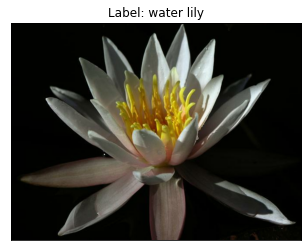

In [7]:
# Plot an image
for image, label in training_set.take(1):
    image = image.numpy()
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image)
    plt.title('Label: {}'.format(class_names[label]))
    break

In [8]:
# Write all the data into images to reuse our previous code

# Create the folder structures
oxford102_dir = os.path.join('..','data', 'oxford102')
train_dir = os.path.join(oxford102_dir, 'train')
validation_dir = os.path.join(oxford102_dir, 'validation')

if not os.path.exists(oxford102_dir):
    os.makedirs(oxford102_dir)
    
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
    
if not os.path.exists(validation_dir):
    os.makedirs(validation_dir)
    
for name in class_names:
    if not os.path.exists(os.path.join(train_dir, name)):
        os.makedirs(os.path.join(train_dir, name))
    
    if not os.path.exists(os.path.join(validation_dir, name)):
        os.makedirs(os.path.join(validation_dir, name))

In [9]:
# Training Images
for idx, (image, label) in enumerate(tqdm(training_set)):
    image = image.numpy()
    plt.imshow(image)
    plt.axis('off')
    plt.savefig(os.path.join(oxford102_dir, 'train', class_names[label],'train_'+str(idx)+'.jpg'), 
                bbox_inches='tight', pad_inches=0)
    plt.clf()

100%|██████████| 1020/1020 [01:34<00:00, 10.84it/s]


<Figure size 432x288 with 0 Axes>

In [10]:
# Validation Images
for idx, (image, label) in enumerate(tqdm(validation_set)):
    image = image.numpy()
    plt.imshow(image)
    plt.axis('off')
    plt.savefig(os.path.join(oxford102_dir, 'validation', class_names[label],'val_'+str(idx)+'.jpg'), 
                bbox_inches='tight', pad_inches=0)
    plt.clf()

100%|██████████| 1020/1020 [01:34<00:00, 10.78it/s]


<Figure size 432x288 with 0 Axes>

# Start the 6 step modeling process from step 2

## Download the dataset

## Download the pre-trained model

In [1]:
# Import the necessary package
from tensorflow.keras.applications import MobileNetV2

In [2]:
# Import the desired pre-trained model
# List of pre-trained models: https://www.tensorflow.org/api_docs/python/tf/keras/applications
pre_trained_model = MobileNetV2(include_top=False, pooling='avg')

In [3]:
# Freeze the model so we don't accidentally change the pre-trained model
pre_trained_model.trainable = False

## Load the Oxford Flowers downloaded dataset into Python

In [4]:
# Import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import os

In [5]:
# Data from Train folder
train_data_location = os.path.join('..', 'data', 'oxford102', 'train')
train_data = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(train_data_location, 
                                                                                             target_size=(224,224))

# Data from Validation folder
validation_data_location = os.path.join('..', 'data', 'oxford102', 'validation')
validation_data = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(validation_data_location,
                                                                                                  shuffle=False,
                                                                                                  target_size=(224,224))

Found 1021 images belonging to 102 classes.
Found 1020 images belonging to 102 classes.


In [6]:
# Check the output mappings
class_mappings = train_data.class_indices
print(f'The class mappings are {class_mappings}')

The class mappings are {'alpine sea holly': 0, 'anthurium': 1, 'artichoke': 2, 'azalea': 3, 'ball moss': 4, 'balloon flower': 5, 'barbeton daisy': 6, 'bearded iris': 7, 'bee balm': 8, 'bird of paradise': 9, 'bishop of llandaff': 10, 'black-eyed susan': 11, 'blackberry lily': 12, 'blanket flower': 13, 'bolero deep blue': 14, 'bougainvillea': 15, 'bromelia': 16, 'buttercup': 17, 'californian poppy': 18, 'camellia': 19, 'canna lily': 20, 'canterbury bells': 21, 'cape flower': 22, 'carnation': 23, 'cautleya spicata': 24, 'clematis': 25, 'colts foot': 26, 'columbine': 27, 'common dandelion': 28, 'corn poppy': 29, 'cyclamen': 30, 'daffodil': 31, 'desert-rose': 32, 'english marigold': 33, 'fire lily': 34, 'foxglove': 35, 'frangipani': 36, 'fritillary': 37, 'garden phlox': 38, 'gaura': 39, 'gazania': 40, 'geranium': 41, 'giant white arum lily': 42, 'globe thistle': 43, 'globe-flower': 44, 'grape hyacinth': 45, 'great masterwort': 46, 'hard-leaved pocket orchid': 47, 'hibiscus': 48, 'hippeastru

## Load and Modify the pre-trained model to suit our dataset

In [7]:
# Import the necessary packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [8]:
# To create a model for our needs, first create a blank model
model = Sequential()

# Then add the pre-trained model to use Transfer Learning
model.add(pre_trained_model)

# Finally add our custom modifications
model.add(Dense(len(class_mappings), activation='softmax'))

# Make the model ready for training
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## Training the model on your dataset

In [9]:
# Train the model
training_history_es = model.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
32/32 [==============================] - 14s 426ms/step - loss: 4.0588 - accuracy: 0.1626 - val_loss: 2.9131 - val_accuracy: 0.4196
Epoch 2/5
32/32 [==============================] - 4s 122ms/step - loss: 2.0033 - accuracy: 0.6523 - val_loss: 1.9864 - val_accuracy: 0.6196
Epoch 3/5
32/32 [==============================] - 4s 129ms/step - loss: 1.1047 - accuracy: 0.8570 - val_loss: 1.5121 - val_accuracy: 0.6922
Epoch 4/5
32/32 [==============================] - 4s 120ms/step - loss: 0.6357 - accuracy: 0.9354 - val_loss: 1.2755 - val_accuracy: 0.7176
Epoch 5/5
32/32 [==============================] - 4s 123ms/step - loss: 0.3894 - accuracy: 0.9677 - val_loss: 1.0983 - val_accuracy: 0.7471


### Plot the training losses

In [10]:
# Import the necessary package
import matplotlib.pyplot as plt

# Custom function
def plot_training_loss(training_history):
    # Plot the Training and Validation losses over each epoch
    plt.plot(training_history.history['loss'], label='training loss')
    plt.plot(training_history.history['val_loss'], label='validation loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    
# Custom function
def plot_training_accuracy(training_history):
    # Plot the Training and Validation losses over each epoch
    plt.plot(training_history.history['accuracy'], label='training accuracy')
    plt.plot(training_history.history['val_accuracy'], label='validation accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()

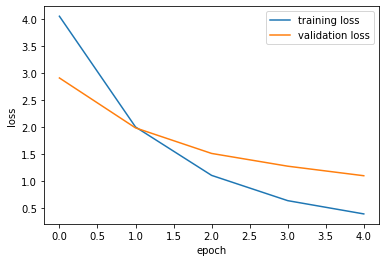

In [11]:
plot_training_loss(training_history_es)

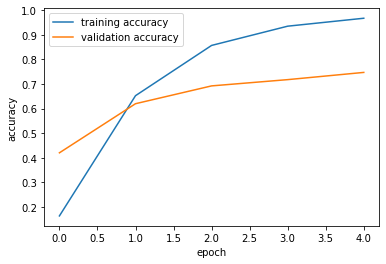

In [12]:
plot_training_accuracy(training_history_es)

## Regularization
- When the training loss continues to decrease below the validation loss while the validation loss either stays constant or increases, the model is overfitting (memorizing).
- Regularization techniques are used to improve overfitting.

### Model with Dropout Regularization

In [13]:
# Import the necessary packages
from tensorflow.keras.layers import Dropout

In [16]:
# To create a model for our needs, first create a blank model
model = Sequential()

# Then add the pre-trained model to use Transfer Learning
model.add(pre_trained_model)

# Finally add our custom modifications
model.add(Dropout(0.5))
model.add(Dense(len(class_mappings), activation='softmax'))

# Make the model ready for training
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 10 epochs with Dropout Regularization
training_history_dropout = model.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
32/32 [==============================] - 5s 153ms/step - loss: 4.8268 - accuracy: 0.0372 - val_loss: 3.3515 - val_accuracy: 0.3059
Epoch 2/5
32/32 [==============================] - 4s 121ms/step - loss: 2.9668 - accuracy: 0.3085 - val_loss: 2.3917 - val_accuracy: 0.5471
Epoch 3/5
32/32 [==============================] - 4s 120ms/step - loss: 1.9642 - accuracy: 0.5514 - val_loss: 1.8607 - val_accuracy: 0.6196
Epoch 4/5
32/32 [==============================] - 4s 120ms/step - loss: 1.3836 - accuracy: 0.7013 - val_loss: 1.5124 - val_accuracy: 0.7029
Epoch 5/5
32/32 [==============================] - 4s 121ms/step - loss: 0.9677 - accuracy: 0.8110 - val_loss: 1.3069 - val_accuracy: 0.7275


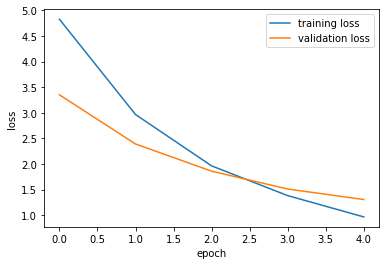

In [17]:
# Plot the training loss with Dropout Regularization
plot_training_loss(training_history_dropout)

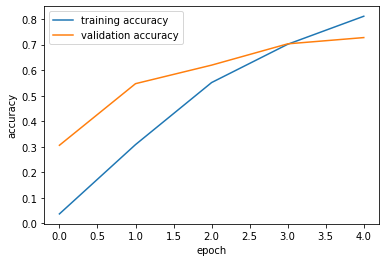

In [18]:
# Plot the training accuracy with Dropout Regularization
plot_training_accuracy(training_history_dropout)

## Investigating the Results

In [19]:
# Import the necessary packages
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd

In [20]:
# Make predictions on the validation data
Y_pred = model.predict(validation_data)
y_pred = np.argmax(Y_pred, axis=1)

In [21]:
# Print the confusion matrix
conf_matrix = confusion_matrix(validation_data.classes, y_pred)
print(conf_matrix)

[[10  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  6]]


In [22]:
# Print the classification report
class_names = class_mappings.keys()
report = classification_report(validation_data.classes, y_pred, target_names=class_names, output_dict=True)

In [23]:
report_df = pd.DataFrame(report).T
report_df.head()

,precision,recall,f1-score,support
alpine sea holly,0.909091,1.0,0.952381,10.0
anthurium,0.833333,1.0,0.909091,10.0
artichoke,1.000000,1.0,1.000000,10.0
azalea,0.714286,0.5,0.588235,10.0
ball moss,0.857143,0.6,0.705882,10.0


In [24]:
report_df.sort_values(by='f1-score', inplace=True)
report_df.head()

,precision,recall,f1-score,support
canterbury bells,0.500000,0.1,0.166667,10.0
clematis,1.000000,0.1,0.181818,10.0
cyclamen,0.181818,0.2,0.190476,10.0
columbine,0.238095,0.5,0.322581,10.0
sweet pea,0.307692,0.4,0.347826,10.0
